In [18]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load player data
df_player_info = pd.read_csv("top5_leagues_player.csv")
df_player_info.head()

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
0,0,Ederson,NaN,29,1.88,Brazil Portugal,Osasco (SP),45.00,70.0,Goalkeeper,31,left,Man City,2026-06-30,2017-07-01,Gestifute,Puma,EPL
1,1,Stefan Ortega,Stefan Ortega Moreno,30,1.85,Germany Spain,Hofgeismar,6.00,6.0,Goalkeeper,18,right,Man City,2025-06-30,2022-07-01,neblung ...,NaN,EPL
2,2,Scott Carson,Scott Paul Carson,37,1.88,England,Whitehaven,0.25,6.0,Goalkeeper,33,right,Man City,2023-06-30,2021-07-20,Wasserman,Puma,EPL
3,3,Rúben Dias,Rúben Santos Gato Alves Dias,26,1.87,Portugal,Amadora,75.00,75.0,Defender - Centre-Back,3,right,Man City,2027-06-30,2020-09-29,Gestifute,Nike,EPL
4,4,Nathan Aké,Nathan Benjamin Aké,28,1.80,Netherlands Cote d'Ivoire,Den Haag,35.00,40.0,Defender - Centre-Back,6,left,Man City,2025-06-30,2020-08-05,Wasserman,Nike,EPL


In [3]:
# clean player data
df_player_info = df_player_info.drop(
    [
        "Unnamed: 0",
        "full_name",
        "nationality",
        "place_of_birth",
        "shirt_nr",
        "foot",
        "club",
        "contract_expires",
        "joined_club",
        "player_agent",
        "outfitter",
    ],
    axis=1,
)
df_player_info.head()

,name,age,height,price,max_price,position,league
0,Ederson,29,1.88,45.00,70.0,Goalkeeper,EPL
1,Stefan Ortega,30,1.85,6.00,6.0,Goalkeeper,EPL
2,Scott Carson,37,1.88,0.25,6.0,Goalkeeper,EPL
3,Rúben Dias,26,1.87,75.00,75.0,Defender - Centre-Back,EPL
4,Nathan Aké,28,1.80,35.00,40.0,Defender - Centre-Back,EPL


In [4]:
# load and clean more data
df_atmid_wingers = pd.read_csv("AtMid_Wingers.csv")
df_centerbacks = pd.read_csv("CenterBacks.csv")
df_forwards = pd.read_csv("Forwards.csv")
df_fullbacks = pd.read_csv("FullBacks.csv")
df_midfielders = pd.read_csv("Midfielders.csv")
df_name_db = pd.read_csv("NAME_DB.csv")

df_merged = pd.concat(
    [
        df_atmid_wingers,
        df_centerbacks,
        df_forwards,
        df_fullbacks,
        df_midfielders,
        df_name_db,
    ],
    ignore_index=True,
)
df_merged = df_merged.drop(["Unnamed: 0", "Links"], axis=1)
df_merged = df_merged.rename(
    columns={
        "Name": "name",
        "Attribute Vector": "attribute-vector",
        "Percentiles": "percentiles",
    }
)

# remove players with missing data (attribute-vector & percentiles = nan)
df_merged = df_merged.dropna(axis=0, thresh=2)

df_merged

,name,attribute-vector,percentiles
0,Brenden Aaronson,"[0.04, 0.15, 1.56, 0.11, 0.16, 0.31, 3.6, 30.2...","[2, 22, 20, 25, 34, 23, 47, 19, 44, 38, 8, 33,..."
1,Zakaria Aboukhlal,"[0.36, 0.42, 3.02, 0.18, 0.12, 0.54, 2.91, 28....","[85, 95, 89, 49, 18, 77, 17, 13, 41, 17, 69, 4..."
2,Karim Adeyemi,"[0.41, 0.31, 2.45, 0.26, 0.25, 0.56, 3.88, 28....","[89, 85, 69, 72, 74, 79, 56, 15, 39, 26, 71, 8..."
3,Amine Adli,"[0.34, 0.33, 2.4, 0.15, 0.13, 0.46, 4.16, 37.8...","[84, 89, 66, 35, 23, 62, 66, 53, 53, 36, 50, 7..."
4,Michel Aebischer,"[0.06, 0.09, 0.88, 0.0, 0.04, 0.12, 2.04, 39.3...","[6, 1, 1, 1, 1, 1, 2, 60, 92, 21, 1, 1, 1, 14,..."
...,...,...,...
1836,Martín Zubimendi,"[0.03, 0.05, 0.36, 0.08, 0.05, 0.1, 1.48, 52.8...","[25, 33, 8, 48, 25, 25, 13, 58, 71, 52, 49, 12..."
1837,Szymon Żurkowski,"[0.0, 0.14, 1.76, 0.2, 0.0, 0.14, 1.18, 23.53,...","[12, 81, 89, 89, 1, 39, 5, 1, 9, 2, 83, 90, 57..."
1838,Szymon Żurkowski,"[0.0, 0.14, 1.76, 0.2, 0.0, 0.14, 1.18, 23.53,...","[12, 81, 89, 89, 1, 39, 5, 1, 9, 2, 83, 90, 57..."
1839,Martin Ødegaard,"[0.4, 0.27, 2.56, 0.19, 0.26, 0.53, 4.81, 52.0...","[99, 99, 99, 86, 98, 99, 99, 57, 39, 90, 86, 8..."


In [5]:
# get attribute names
non_gk_names = [
    "Non-Penalty Goals",
    "Non-Penalty xG",
    "Shots Total",
    "Assists",
    "xAG",
    "npxG + xAG",
    "Shot-Creating Actions",
    "Passes Attempted",
    "Pass Completion %",
    "Progressive Passes",
    "Progressive Carries",
    "Successful Take-Ons",
    "Touches (Att Pen)",
    "Progressive Passes Rec",
    "Tackles",
    "Interceptions",
    "Blocks",
    "Clearances",
    "Aerials won",
]

# add attributes as columns
for col in non_gk_names:
    df_merged.insert(len(df_merged.columns), col.lower().replace(" ", "-"), np.nan)

df_merged.head()

,name,attribute-vector,percentiles,non-penalty-goals,non-penalty-xg,shots-total,assists,xag,npxg-+-xag,shot-creating-actions,...,progressive-passes,progressive-carries,successful-take-ons,touches-(att-pen),progressive-passes-rec,tackles,interceptions,blocks,clearances,aerials-won
0,Brenden Aaronson,"[0.04, 0.15, 1.56, 0.11, 0.16, 0.31, 3.6, 30.2...","[2, 22, 20, 25, 34, 23, 47, 19, 44, 38, 8, 33,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Zakaria Aboukhlal,"[0.36, 0.42, 3.02, 0.18, 0.12, 0.54, 2.91, 28....","[85, 95, 89, 49, 18, 77, 17, 13, 41, 17, 69, 4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Karim Adeyemi,"[0.41, 0.31, 2.45, 0.26, 0.25, 0.56, 3.88, 28....","[89, 85, 69, 72, 74, 79, 56, 15, 39, 26, 71, 8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Amine Adli,"[0.34, 0.33, 2.4, 0.15, 0.13, 0.46, 4.16, 37.8...","[84, 89, 66, 35, 23, 62, 66, 53, 53, 36, 50, 7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Michel Aebischer,"[0.06, 0.09, 0.88, 0.0, 0.04, 0.12, 2.04, 39.3...","[6, 1, 1, 1, 1, 1, 2, 60, 92, 21, 1, 1, 1, 14,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# load data into new attributes
for row in df_merged.index:
    vectors = df_merged["attribute-vector"][row]
    # cover nan
    if type(vectors) == float:
        continue

    # remove leading/trailing '[' and ']' and split
    vector_strs = vectors[1:-1].split(", ")
    for col in range(len(vector_strs)):
        df_merged.iat[row, col+3] = float(vector_strs[col])

df_merged.head()

,name,attribute-vector,percentiles,non-penalty-goals,non-penalty-xg,shots-total,assists,xag,npxg-+-xag,shot-creating-actions,...,progressive-passes,progressive-carries,successful-take-ons,touches-(att-pen),progressive-passes-rec,tackles,interceptions,blocks,clearances,aerials-won
0,Brenden Aaronson,"[0.04, 0.15, 1.56, 0.11, 0.16, 0.31, 3.6, 30.2...","[2, 22, 20, 25, 34, 23, 47, 19, 44, 38, 8, 33,...",0.04,0.15,1.56,0.11,0.16,0.31,3.60,...,3.26,1.63,1.29,2.73,5.73,1.71,0.19,1.63,0.23,0.30
1,Zakaria Aboukhlal,"[0.36, 0.42, 3.02, 0.18, 0.12, 0.54, 2.91, 28....","[85, 95, 89, 49, 18, 77, 17, 13, 41, 17, 69, 4...",0.36,0.42,3.02,0.18,0.12,0.54,2.91,...,2.62,3.64,1.53,5.46,10.04,1.20,0.80,0.66,0.84,0.44
2,Karim Adeyemi,"[0.41, 0.31, 2.45, 0.26, 0.25, 0.56, 3.88, 28....","[89, 85, 69, 72, 74, 79, 56, 15, 39, 26, 71, 8...",0.41,0.31,2.45,0.26,0.25,0.56,3.88,...,2.86,3.68,2.25,4.44,8.27,0.87,0.46,1.07,0.20,0.56
3,Amine Adli,"[0.34, 0.33, 2.4, 0.15, 0.13, 0.46, 4.16, 37.8...","[84, 89, 66, 35, 23, 62, 66, 53, 53, 36, 50, 7...",0.34,0.33,2.40,0.15,0.13,0.46,4.16,...,3.13,3.08,1.96,4.40,9.20,1.37,0.39,1.86,0.44,1.96
4,Michel Aebischer,"[0.06, 0.09, 0.88, 0.0, 0.04, 0.12, 2.04, 39.3...","[6, 1, 1, 1, 1, 1, 2, 60, 92, 21, 1, 1, 1, 14,...",0.06,0.09,0.88,0.00,0.04,0.12,2.04,...,2.68,0.82,0.35,1.63,4.96,0.70,0.41,0.82,0.53,0.58


In [7]:
# merge player info and merged data
df_final = pd.merge(df_merged, df_player_info, on="name", how="left")

# remove duplicates and goalkeepers (only using non-gk players)
df_final = df_final.drop_duplicates()
df_final.drop(df_final[df_final["position"] == "Goalkeeper"].index, inplace=True)

df_final

,name,attribute-vector,percentiles,non-penalty-goals,non-penalty-xg,shots-total,assists,xag,npxg-+-xag,shot-creating-actions,...,interceptions,blocks,clearances,aerials-won,age,height,price,max_price,position,league
0,Brenden Aaronson,"[0.04, 0.15, 1.56, 0.11, 0.16, 0.31, 3.6, 30.2...","[2, 22, 20, 25, 34, 23, 47, 19, 44, 38, 8, 33,...",0.04,0.15,1.56,0.11,0.16,0.31,3.60,...,0.19,1.63,0.23,0.30,22.0,1.77,30.0,30.0,midfield - Attacking Midfield,Other
1,Zakaria Aboukhlal,"[0.36, 0.42, 3.02, 0.18, 0.12, 0.54, 2.91, 28....","[85, 95, 89, 49, 18, 77, 17, 13, 41, 17, 69, 4...",0.36,0.42,3.02,0.18,0.12,0.54,2.91,...,0.80,0.66,0.84,0.44,23.0,1.79,7.0,7.0,Attack - Right Winger,Ligue1
2,Karim Adeyemi,"[0.41, 0.31, 2.45, 0.26, 0.25, 0.56, 3.88, 28....","[89, 85, 69, 72, 74, 79, 56, 15, 39, 26, 71, 8...",0.41,0.31,2.45,0.26,0.25,0.56,3.88,...,0.46,1.07,0.20,0.56,21.0,1.80,35.0,35.0,Attack - Left Winger,Bundesliga
3,Amine Adli,"[0.34, 0.33, 2.4, 0.15, 0.13, 0.46, 4.16, 37.8...","[84, 89, 66, 35, 23, 62, 66, 53, 53, 36, 50, 7...",0.34,0.33,2.40,0.15,0.13,0.46,4.16,...,0.39,1.86,0.44,1.96,23.0,1.74,15.0,15.0,Attack - Left Winger,Bundesliga
4,Michel Aebischer,"[0.06, 0.09, 0.88, 0.0, 0.04, 0.12, 2.04, 39.3...","[6, 1, 1, 1, 1, 1, 2, 60, 92, 21, 1, 1, 1, 14,...",0.06,0.09,0.88,0.00,0.04,0.12,2.04,...,0.41,0.82,0.53,0.58,26.0,1.83,3.5,5.5,midfield - Central Midfield,SerieA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1842,Piotr Zieliński,"[0.15, 0.16, 2.08, 0.31, 0.29, 0.46, 5.45, 59....","[80, 87, 93, 99, 99, 99, 99, 78, 59, 52, 82, 6...",0.15,0.16,2.08,0.31,0.29,0.46,5.45,...,0.56,0.59,0.34,0.15,NaN,NaN,NaN,NaN,NaN,NaN
1843,Martín Zubimendi,"[0.03, 0.05, 0.36, 0.08, 0.05, 0.1, 1.48, 52.8...","[25, 33, 8, 48, 25, 25, 13, 58, 71, 52, 49, 12...",0.03,0.05,0.36,0.08,0.05,0.10,1.48,...,1.27,1.27,1.59,1.72,24.0,1.81,40.0,40.0,midfield - Defensive Midfield,LaLiga
1844,Szymon Żurkowski,"[0.0, 0.14, 1.76, 0.2, 0.0, 0.14, 1.18, 23.53,...","[12, 81, 89, 89, 1, 39, 5, 1, 9, 2, 83, 90, 57...",0.00,0.14,1.76,0.20,0.00,0.14,1.18,...,0.78,1.76,1.18,1.37,NaN,NaN,NaN,NaN,NaN,NaN
1846,Martin Ødegaard,"[0.4, 0.27, 2.56, 0.19, 0.26, 0.53, 4.81, 52.0...","[99, 99, 99, 86, 98, 99, 99, 57, 39, 90, 86, 8...",0.40,0.27,2.56,0.19,0.26,0.53,4.81,...,0.21,0.56,0.32,0.35,24.0,1.78,80.0,80.0,midfield - Attacking Midfield,EPL



## Key Metrics For Positions

To evaluate the importance of each attribute for specific football positions, let's break down which metrics are particularly crucial for attacking midfielders, centre backs, fullbacks, midfielders, defensive midfielders, wingers, and strikers. These metrics help in understanding the players' contribution to the team beyond traditional stats.

### Attacking Midfielders
1. Non-Penalty Goals & Non-Penalty xG
2. Assists & xAG
3. Shot-Creating Actions
4. Passes Attempted & Pass Completion %
5. Progressive Passes & Progressive Carries
6. Touches (Att Pen)

### Centre Backs
1. Tackles, Interceptions,Blocks, Clearances
2. Aerials won
3. Passes Attempted & Pass Completion %
4. Progressive Passes

### Fullbacks
1. Assists & xAG
2. Progressive Passes & Progressive Carries
3. Successful Take-Ons
4. Tackles, Interceptions, Blocks

### Midfielders (Central/Box-to-Box)
1. Passes Attempted & Pass Completion %, Progressive Passes
2. Shot-Creating Actions
3. Tackles & Interceptions
4. Progressive Carries & Successful Take-Ons

### Defensive Midfielders
1. Tackles, Interceptions, Blocks
2. Passes Attempted & Pass Completion %
3. Progressive Passes
4. Aerials won

### Wingers
1. Non-Penalty Goals & Non-Penalty xG
2. Assists & xAG
3. Shot-Creating Actions & Progressive Carries
4. Successful Take-Ons & Touches (Att Pen)

### Strikers
1. Non-Penalty Goals & Non-Penalty xG
2. Assists & xAG
3. Shots Total
4. Touches (Att Pen)
5. Aerials won

In [8]:
df_final


,name,attribute-vector,percentiles,non-penalty-goals,non-penalty-xg,shots-total,assists,xag,npxg-+-xag,shot-creating-actions,...,interceptions,blocks,clearances,aerials-won,age,height,price,max_price,position,league
0,Brenden Aaronson,"[0.04, 0.15, 1.56, 0.11, 0.16, 0.31, 3.6, 30.2...","[2, 22, 20, 25, 34, 23, 47, 19, 44, 38, 8, 33,...",0.04,0.15,1.56,0.11,0.16,0.31,3.60,...,0.19,1.63,0.23,0.30,22.0,1.77,30.0,30.0,midfield - Attacking Midfield,Other
1,Zakaria Aboukhlal,"[0.36, 0.42, 3.02, 0.18, 0.12, 0.54, 2.91, 28....","[85, 95, 89, 49, 18, 77, 17, 13, 41, 17, 69, 4...",0.36,0.42,3.02,0.18,0.12,0.54,2.91,...,0.80,0.66,0.84,0.44,23.0,1.79,7.0,7.0,Attack - Right Winger,Ligue1
2,Karim Adeyemi,"[0.41, 0.31, 2.45, 0.26, 0.25, 0.56, 3.88, 28....","[89, 85, 69, 72, 74, 79, 56, 15, 39, 26, 71, 8...",0.41,0.31,2.45,0.26,0.25,0.56,3.88,...,0.46,1.07,0.20,0.56,21.0,1.80,35.0,35.0,Attack - Left Winger,Bundesliga
3,Amine Adli,"[0.34, 0.33, 2.4, 0.15, 0.13, 0.46, 4.16, 37.8...","[84, 89, 66, 35, 23, 62, 66, 53, 53, 36, 50, 7...",0.34,0.33,2.40,0.15,0.13,0.46,4.16,...,0.39,1.86,0.44,1.96,23.0,1.74,15.0,15.0,Attack - Left Winger,Bundesliga
4,Michel Aebischer,"[0.06, 0.09, 0.88, 0.0, 0.04, 0.12, 2.04, 39.3...","[6, 1, 1, 1, 1, 1, 2, 60, 92, 21, 1, 1, 1, 14,...",0.06,0.09,0.88,0.00,0.04,0.12,2.04,...,0.41,0.82,0.53,0.58,26.0,1.83,3.5,5.5,midfield - Central Midfield,SerieA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1842,Piotr Zieliński,"[0.15, 0.16, 2.08, 0.31, 0.29, 0.46, 5.45, 59....","[80, 87, 93, 99, 99, 99, 99, 78, 59, 52, 82, 6...",0.15,0.16,2.08,0.31,0.29,0.46,5.45,...,0.56,0.59,0.34,0.15,NaN,NaN,NaN,NaN,NaN,NaN
1843,Martín Zubimendi,"[0.03, 0.05, 0.36, 0.08, 0.05, 0.1, 1.48, 52.8...","[25, 33, 8, 48, 25, 25, 13, 58, 71, 52, 49, 12...",0.03,0.05,0.36,0.08,0.05,0.10,1.48,...,1.27,1.27,1.59,1.72,24.0,1.81,40.0,40.0,midfield - Defensive Midfield,LaLiga
1844,Szymon Żurkowski,"[0.0, 0.14, 1.76, 0.2, 0.0, 0.14, 1.18, 23.53,...","[12, 81, 89, 89, 1, 39, 5, 1, 9, 2, 83, 90, 57...",0.00,0.14,1.76,0.20,0.00,0.14,1.18,...,0.78,1.76,1.18,1.37,NaN,NaN,NaN,NaN,NaN,NaN
1846,Martin Ødegaard,"[0.4, 0.27, 2.56, 0.19, 0.26, 0.53, 4.81, 52.0...","[99, 99, 99, 86, 98, 99, 99, 57, 39, 90, 86, 8...",0.40,0.27,2.56,0.19,0.26,0.53,4.81,...,0.21,0.56,0.32,0.35,24.0,1.78,80.0,80.0,midfield - Attacking Midfield,EPL


In [242]:
print(df_final.columns)

Index(['name', 'attribute-vector', 'percentiles', 'non-penalty-goals',
       'non-penalty-xg', 'shots-total', 'assists', 'xag', 'npxg-+-xag',
       'shot-creating-actions', 'passes-attempted', 'pass-completion-%',
       'progressive-passes', 'progressive-carries', 'successful-take-ons',
       'touches-(att-pen)', 'progressive-passes-rec', 'tackles',
       'interceptions', 'blocks', 'clearances', 'aerials-won', 'age', 'height',
       'price', 'max_price', 'position', 'league'],
      dtype='object')


In [296]:
df_final['position'] = df_final['position'].str.replace('midfield - ', '', regex=False)
df_final['position'] = df_final['position'].str.replace('Attack - ', '', regex=False)
df_final['position'] = df_final['position'].str.replace('Defender - ', '', regex=False)


In [297]:
df_amc = df_final[df_final['position'] == 'Attacking Midfield']


In [298]:
# Selected important columns for "Attacking Midfielders"
amc_columns = [
    'name','age','league','non-penalty-goals', 'non-penalty-xg', 'assists',
    'xag', 'shot-creating-actions', 'passes-attempted',
    'pass-completion-%', 'progressive-passes', 'successful-take-ons',
     'price','progressive-carries', 'progressive-passes-rec','npxg-+-xag','touches-(att-pen)','shots-total'
]

# Filtering for "Attacking Midfielder" players and selecting the 13 important columns
df_amc = df_amc[amc_columns]


In [299]:
df_amc

,name,age,league,non-penalty-goals,non-penalty-xg,assists,xag,shot-creating-actions,passes-attempted,pass-completion-%,progressive-passes,successful-take-ons,price,progressive-carries,progressive-passes-rec,npxg-+-xag,touches-(att-pen),shots-total
0,Brenden Aaronson,22.0,Other,0.04,0.15,0.11,0.16,3.60,30.24,74.3,3.26,1.29,30.0,1.63,5.73,0.31,2.73,1.56
12,Joe Aribo,26.0,EPL,0.15,0.11,0.00,0.06,1.99,28.31,72.7,2.87,1.25,15.0,1.40,4.71,0.17,3.38,1.03
18,Nedim Bajrami,24.0,SerieA,0.10,0.16,0.05,0.13,3.74,35.97,71.8,3.74,1.48,8.0,2.30,7.32,0.30,2.87,2.25
20,Tommaso Baldanzi,20.0,Other,0.20,0.12,0.00,0.09,3.05,32.86,82.5,3.50,1.17,10.0,2.90,4.77,0.21,2.34,1.68
33,Ludovic Blas,25.0,Ligue1,0.21,0.20,0.21,0.19,4.08,37.90,78.3,4.64,2.79,18.0,3.97,7.84,0.39,3.38,3.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,David Silva,37.0,LaLiga,0.12,0.16,0.20,0.15,3.82,55.88,84.8,7.52,0.94,4.0,3.31,5.78,0.31,3.38,1.30
1782,Kevin Stöger,29.0,Bundesliga,0.07,0.07,0.10,0.20,4.78,55.65,69.3,7.41,0.76,2.5,1.49,3.39,0.27,1.28,1.56
1783,Denis Suárez,29.0,LaLiga,0.00,0.05,0.00,0.10,3.24,43.05,73.2,4.10,1.81,5.0,2.48,3.24,0.15,1.14,0.38
1796,Kristian Thorstvedt,24.0,SerieA,0.16,0.17,0.08,0.09,2.22,38.66,76.2,4.75,0.55,8.5,2.46,4.28,0.25,2.85,1.58


In [374]:

important_columns_cb = [
    'name', 'tackles', 'interceptions', 'blocks', 'clearances',
    'aerials-won', 'passes-attempted', 'pass-completion-%', 'league','max_price'
]

important_columns_fb = [
    'name', 'assists', 'progressive-passes', 'successful-take-ons', 
    'tackles', 'interceptions', 'league','max_price'
]

important_columns_dm = [
    'name', 'tackles', 'interceptions', 'blocks', 'passes-attempted', 
    'pass-completion-%', 'progressive-passes','progressive-carries' , 'aerials-won', 'league','max_price'
]

important_columns_wg = [
    'name','age','price', 'non-penalty-goals', 'non-penalty-xg', 'assists', 'xag', 
    'successful-take-ons', 'shot-creating-actions', 'touches-(att-pen)', 'league',
]

important_columns_st = [
    'name','age','price', 'non-penalty-goals', 'non-penalty-xg', 'shots-total', 'assists', 
    'xag', 'touches-(att-pen)', 'aerials-won', 'league','shots-total','progressive-passes-rec','successful-take-ons','npxg-+-xag','shot-creating-actions'
    
]

important_columns_cm = [
    'name', 'passes-attempted', 'pass-completion-%', 'progressive-passes',
    'tackles', 'interceptions', 'shot-creating-actions', 'league','max_price'
]

important_columns_rm_lm = [
    'name', 'assists', 'successful-take-ons', 'tackles', 'interceptions',
    'passes-attempted', 'progressive-passes', 'shot-creating-actions', 'league','max_price'
]

df_cb = df_final[df_final['position'] == 'Centre-Back']
df_rb = df_final[df_final['position'] == 'Right-Back']
df_lb = df_final[df_final['position'] == 'Left-Back']
df_rm = df_final[df_final['position'] == 'Right Midfield']
df_lm = df_final[df_final['position'] == 'Left Midfield']
df_cf = df_final[df_final['position'] == 'Centre-Forward']
df_ss = df_final[df_final['position'] == 'Second Striker']
df_rw = df_final[df_final['position'] == 'Right Winger']
df_lw = df_final[df_final['position'] == 'Left Winger']
df_dm = df_final[df_final['position'] == 'Defensive Midfield']
df_cm = df_final[df_final['position'] == 'Central Midfield']

df_cm = df_cm[important_columns_cm]
df_dm = df_dm[important_columns_dm]
df_lw = df_lw[important_columns_wg]
df_rw = df_rw[important_columns_wg]
df_ss = df_ss[important_columns_st]
df_cf = df_cf[important_columns_st]
df_lm = df_lm[important_columns_rm_lm]
df_rm = df_rm[important_columns_rm_lm]
df_rb = df_rb[important_columns_fb]
df_lb = df_lb[important_columns_fb]
df_cb = df_cb[important_columns_cb]

 # Discovering and Visualizing Data

## Attacking Midfielder - - Data Discovery

In [326]:
from sklearn.preprocessing import StandardScaler
import numpy as np


league_scores = {
    'EPL': 5, 
    'LaLiga': 4.5, 
    'Bundesliga': 3.5, 
    'SerieA': 3.0, 
    'Ligue1': 3.0, 
    'Other': 3
}
df_amc['league_score'] = df_amc['league'].map(league_scores)

df_amc



,name,age,league,non-penalty-goals,non-penalty-xg,assists,xag,shot-creating-actions,passes-attempted,pass-completion-%,...,price,progressive-carries,progressive-passes-rec,npxg-+-xag,touches-(att-pen),shots-total,league_score,Performance_Index,expected_price,underrated_score
0,Brenden Aaronson,22.0,Other,0.04,0.15,0.11,0.16,3.60,30.24,74.3,...,30.0,1.63,5.73,0.31,2.73,1.56,3.0,2.578981,0.342715,-29.657285
12,Joe Aribo,26.0,EPL,0.15,0.11,0.00,0.06,1.99,28.31,72.7,...,15.0,1.40,4.71,0.17,3.38,1.03,5.0,4.155699,22.775597,7.775597
18,Nedim Bajrami,24.0,SerieA,0.10,0.16,0.05,0.13,3.74,35.97,71.8,...,8.0,2.30,7.32,0.30,2.87,2.25,3.0,3.306368,10.691670,2.691670
20,Tommaso Baldanzi,20.0,Other,0.20,0.12,0.00,0.09,3.05,32.86,82.5,...,10.0,2.90,4.77,0.21,2.34,1.68,3.0,2.585882,0.440897,-9.559103
33,Ludovic Blas,25.0,Ligue1,0.21,0.20,0.21,0.19,4.08,37.90,78.3,...,18.0,3.97,7.84,0.39,3.38,3.12,3.0,3.618076,15.126520,-2.873480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,David Silva,37.0,LaLiga,0.12,0.16,0.20,0.15,3.82,55.88,84.8,...,4.0,3.31,5.78,0.31,3.38,1.30,4.5,4.782618,31.695131,27.695131
1782,Kevin Stöger,29.0,Bundesliga,0.07,0.07,0.10,0.20,4.78,55.65,69.3,...,2.5,1.49,3.39,0.27,1.28,1.56,3.5,3.179407,8.885322,6.385322
1783,Denis Suárez,29.0,LaLiga,0.00,0.05,0.00,0.10,3.24,43.05,73.2,...,5.0,2.48,3.24,0.15,1.14,0.38,4.5,3.628502,15.274859,10.274859
1796,Kristian Thorstvedt,24.0,SerieA,0.16,0.17,0.08,0.09,2.22,38.66,76.2,...,8.5,2.46,4.28,0.25,2.85,1.58,3.0,3.072938,7.370530,-1.129470


In [327]:
# Define metrics to include in the Performance Index, excluding 'league_score' for now
metrics = ['non-penalty-goals', 'non-penalty-xg', 'assists', 'xag', 'shot-creating-actions',
           'passes-attempted', 'pass-completion-%', 'progressive-passes', 
           'successful-take-ons','progressive-carries','progressive-passes-rec','npxg-+-xag','touches-(att-pen)','shots-total']


# Standardize metrics
scaler = StandardScaler()
df_amc_scaled = scaler.fit_transform(df_amc[metrics])


# Calculate Performance Index as mean of standardized metrics, then add league_score
df_amc['Performance_Index'] = df_amc_scaled.mean(axis=1) + df_amc['league_score']


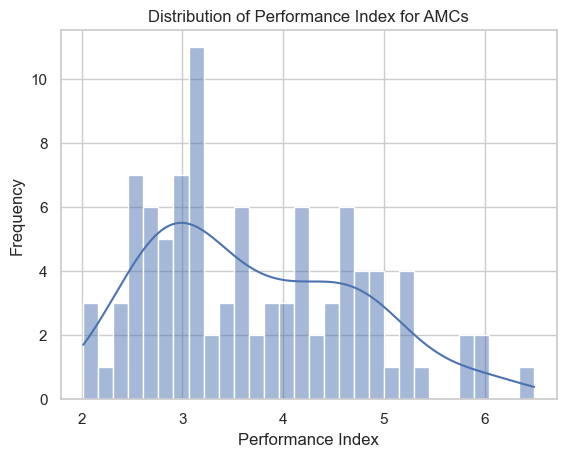

In [328]:
sns.histplot(df_amc['Performance_Index'], bins=30, kde=True)
plt.title('Distribution of Performance Index for AMCs')
plt.xlabel('Performance Index')
plt.ylabel('Frequency')
plt.show()

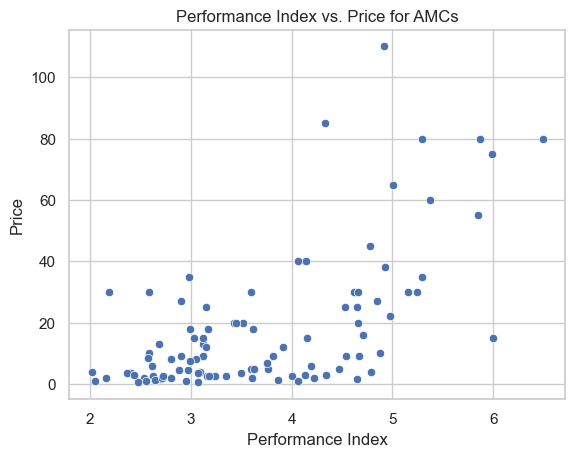

In [329]:
sns.scatterplot(x='Performance_Index', y='price', data=df_amc)
plt.title('Performance Index vs. Price for AMCs')
plt.xlabel('Performance Index')
plt.ylabel('Price')
plt.show()


Central Forwards -- Data Discovery 

In [375]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_cf is your DataFrame for Centre-Forward players and it's already defined with 'league' and other columns

# Map league scores
league_scores = {
    'EPL': 5, 
    'LaLiga': 4.5, 
    'Bundesliga': 3.5, 
    'SerieA': 3.5, 
    'Ligue1': 3.0, 
    'Other': 3
}
df_cf['league_score'] = df_cf['league'].map(league_scores)

# Metrics for Centre-Forwards
metrics_cf = [
    'non-penalty-goals', 'non-penalty-xg', 'shots-total', 
    'xag', 'touches-(att-pen)', 'shots-total','npxg-+-xag',
]

# Including 'league_score' in the features
features_cf = metrics_cf + ['league_score']

# Standardizing the metrics
scaler = StandardScaler()
df_cf_scaled = scaler.fit_transform(df_cf[features_cf])

# Correcting the DataFrame reference for Performance Index calculation
df_cf['Performance_Index'] = np.mean(df_cf_scaled, axis=1) + df_cf['league_score']



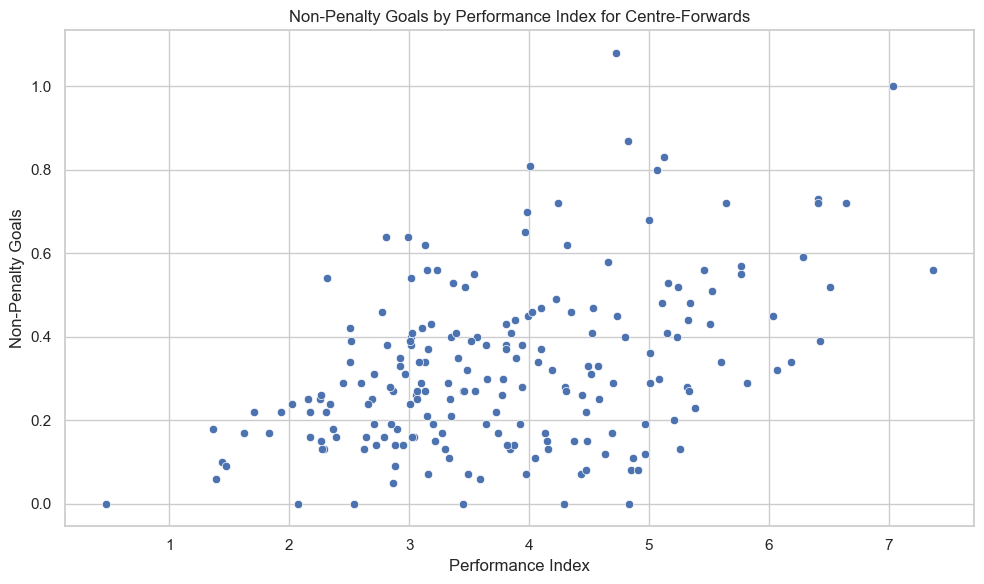

In [376]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Performance_Index', y='non-penalty-goals', data=df_cf,  palette='Set1')
plt.title('Non-Penalty Goals by Performance Index for Centre-Forwards')
plt.xlabel('Performance Index')
plt.ylabel('Non-Penalty Goals')

plt.tight_layout()
plt.show()


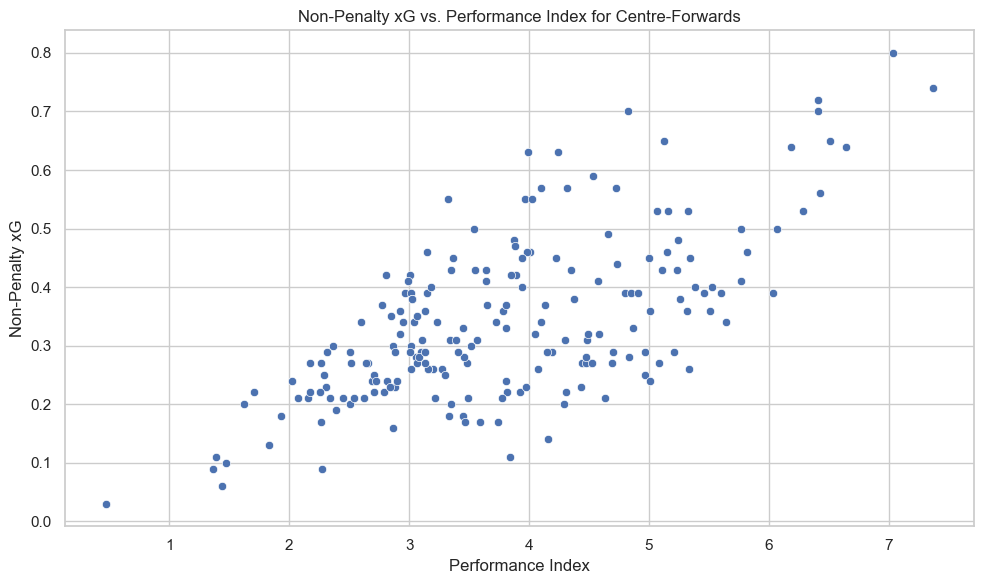

In [377]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Performance_Index', y='non-penalty-xg', data=df_cf,  palette='coolwarm')
plt.title('Non-Penalty xG vs. Performance Index for Centre-Forwards')
plt.xlabel('Performance Index')
plt.ylabel('Non-Penalty xG')

plt.grid(True)
plt.tight_layout()
plt.show()


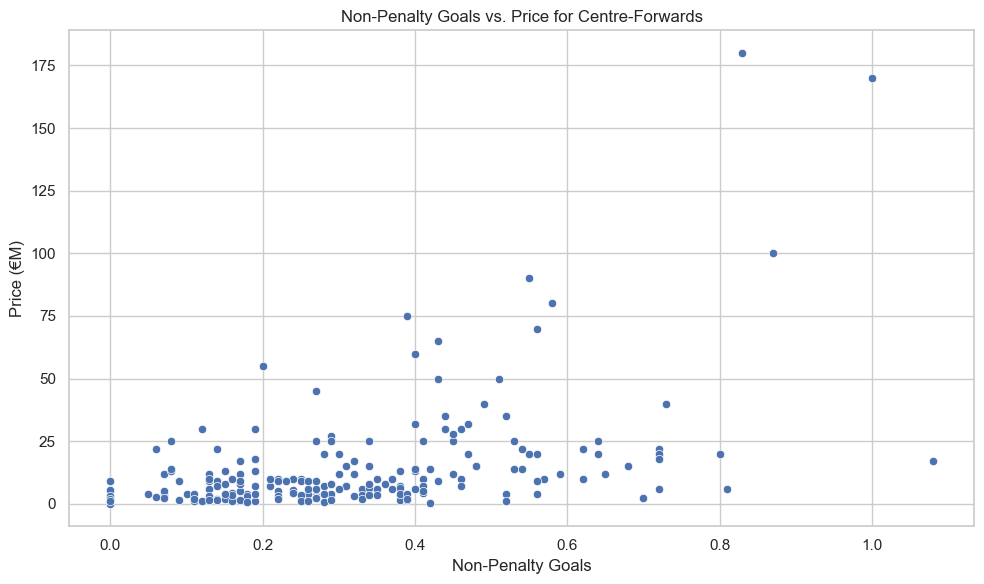

In [378]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='non-penalty-goals', y='price', data=df_cf, palette='tab10')
plt.title('Non-Penalty Goals vs. Price for Centre-Forwards')
plt.xlabel('Non-Penalty Goals')
plt.ylabel('Price (€M)')

plt.grid(True)
plt.tight_layout()
plt.show()


## Starting Linear regression 

In [305]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Assuming 'df_amc' is your DataFrame and 'league_scores' dictionary is defined
# Map the league scores to the 'league' column
league_scores = {
    'EPL': 5, 
    'LaLiga': 4.5, 
    'Bundesliga': 3.5, 
    'SerieA': 3.5, 
    'Ligue1': 3.0, 
    'Other': 3
}
df_amc['league_score'] = df_amc['league'].map(league_scores)

# Define metrics to include in the Performance Index, excluding 'league_score' for now
metrics = ['non-penalty-goals', 'non-penalty-xg', 'assists', 'xag', 'shot-creating-actions',
           'passes-attempted', 'pass-completion-%', 'progressive-passes', 
           'successful-take-ons','progressive-carries','progressive-passes-rec','npxg-+-xag','touches-(att-pen)','shots-total']

# Standardize metrics
scaler = StandardScaler()
df_amc_scaled = pd.DataFrame(scaler.fit_transform(df_amc[metrics]), columns=metrics, index=df_amc.index)

# Calculate Performance Index as mean of standardized metrics
df_amc['Performance_Index'] = df_amc_scaled.mean(axis=1)

# Then add league_score to Performance Index
df_amc['Performance_Index'] += df_amc['league_score']


In [323]:
df_amc.head(5)

,name,age,league,non-penalty-goals,non-penalty-xg,assists,xag,shot-creating-actions,passes-attempted,pass-completion-%,...,price,progressive-carries,progressive-passes-rec,npxg-+-xag,touches-(att-pen),shots-total,league_score,Performance_Index,expected_price,underrated_score
0,Brenden Aaronson,22.0,Other,0.04,0.15,0.11,0.16,3.60,30.24,74.3,...,30.0,1.63,5.73,0.31,2.73,1.56,3.0,2.578981,0.342715,-29.657285
12,Joe Aribo,26.0,EPL,0.15,0.11,0.00,0.06,1.99,28.31,72.7,...,15.0,1.40,4.71,0.17,3.38,1.03,5.0,4.155699,22.775597,7.775597
18,Nedim Bajrami,24.0,SerieA,0.10,0.16,0.05,0.13,3.74,35.97,71.8,...,8.0,2.30,7.32,0.30,2.87,2.25,3.5,3.306368,10.691670,2.691670
20,Tommaso Baldanzi,20.0,Other,0.20,0.12,0.00,0.09,3.05,32.86,82.5,...,10.0,2.90,4.77,0.21,2.34,1.68,3.0,2.585882,0.440897,-9.559103
33,Ludovic Blas,25.0,Ligue1,0.21,0.20,0.21,0.19,4.08,37.90,78.3,...,18.0,3.97,7.84,0.39,3.38,3.12,3.0,3.618076,15.126520,-2.873480


In [315]:
# Including the Performance Index and league score in our features, excluding the target variable 'price'
X = df_amc[['Performance_Index']]  # Add other features as needed
y = df_amc['price']  # Target variable

# Splitting the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

df_amc['expected_price'] = model.predict(df_amc[['Performance_Index']])

df_amc['underrated_score'] = df_amc['expected_price'] - df_amc['price']

undervalued_players = df_amc[df_amc['underrated_score'] > 0].sort_values(by='underrated_score', ascending=False)

In [311]:
undervalued_players.head(10)

,name,age,league,non-penalty-goals,non-penalty-xg,assists,xag,shot-creating-actions,passes-attempted,pass-completion-%,...,price,progressive-carries,progressive-passes-rec,npxg-+-xag,touches-(att-pen),shots-total,league_score,Performance_Index,expected_price,underrated_score
1681,Cole Palmer,21.0,EPL,0.00,0.27,0.18,0.11,3.90,45.35,86.3,...,15.0,6.91,9.04,0.37,7.62,2.66,5.0,5.997188,48.975520,33.975520
153,Adam Lallana,35.0,EPL,0.25,0.11,0.12,0.12,2.74,39.52,82.6,...,1.5,1.25,5.36,0.24,4.11,1.00,5.0,4.650957,29.821909,28.321909
1763,David Silva,37.0,LaLiga,0.12,0.16,0.20,0.15,3.82,55.88,84.8,...,4.0,3.31,5.78,0.31,3.38,1.30,4.5,4.782618,31.695131,27.695131
186,Iker Muniain,30.0,LaLiga,0.00,0.16,0.16,0.21,5.75,59.15,80.2,...,10.0,2.66,5.49,0.37,2.13,1.49,4.5,4.880677,33.090275,23.090275
291,Óscar Trejo,35.0,LaLiga,0.08,0.08,0.17,0.14,4.32,42.17,80.7,...,3.0,2.35,4.62,0.21,3.02,0.97,4.5,4.337338,25.359880,22.359880
52,Rémy Cabella,33.0,Ligue1,0.25,0.30,0.36,0.38,6.45,62.88,79.2,...,5.0,4.03,8.63,0.68,4.85,1.50,3.0,4.467933,27.217920,22.217920
212,Dimitri Payet,36.0,Ligue1,0.30,0.24,0.30,0.35,5.43,57.04,74.7,...,2.0,2.37,9.67,0.58,4.05,2.86,3.0,4.223405,23.738885,21.738885
48,Facundo Buonanotte,18.0,EPL,0.16,0.22,0.16,0.08,2.23,30.90,80.9,...,9.0,1.43,6.69,0.30,3.03,1.75,5.0,4.668531,30.071953,21.071953
1614,Iván Martín,24.0,LaLiga,0.17,0.14,0.17,0.12,1.93,38.13,84.1,...,1.0,1.70,4.65,0.27,2.04,1.02,4.5,4.066087,21.500635,20.500635
252,Riccardo Saponara,31.0,SerieA,0.30,0.21,0.22,0.25,3.65,34.05,72.0,...,2.0,4.17,9.31,0.46,4.54,2.76,3.5,4.102324,22.016194,20.016194


In [319]:
# Adjusting the feature set to include the Performance Index and age
X = df_amc[['Performance_Index', 'age']]
y = df_amc['price']  # Target variable remains the same

# Splitting the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Re-initialize and train the Linear Regression model with the adjusted features
model = LinearRegression()
model.fit(X_train, y_train)


# Identifying undervalued players, with an emphasis on younger talents
undervalued_players = df_amc[(df_amc['Performance_Index'] > 0) & (df_amc['age'] < 28) & (df_amc['price'] < 15.0 )].sort_values(by='Performance_Index', ascending=False)

# Displaying top 10 undervalued young players
undervalued_players.head(10)


,name,age,league,non-penalty-goals,non-penalty-xg,assists,xag,shot-creating-actions,passes-attempted,pass-completion-%,...,price,progressive-carries,progressive-passes-rec,npxg-+-xag,touches-(att-pen),shots-total,league_score,Performance_Index,expected_price,underrated_score
48,Facundo Buonanotte,18.0,EPL,0.16,0.22,0.16,0.08,2.23,30.90,80.9,...,9.0,1.43,6.69,0.30,3.03,1.75,5.0,4.668531,30.071953,21.071953
1673,Aimar Oroz,21.0,LaLiga,0.09,0.13,0.27,0.13,3.44,36.66,79.1,...,6.0,1.56,6.44,0.25,2.46,0.98,4.5,4.195158,23.337003,17.337003
1710,Reinier,21.0,LaLiga,0.28,0.18,0.14,0.08,2.64,34.50,79.8,...,3.0,1.81,3.76,0.25,2.78,1.39,4.5,4.136334,22.500073,19.500073
1614,Iván Martín,24.0,LaLiga,0.17,0.14,0.17,0.12,1.93,38.13,84.1,...,1.0,1.70,4.65,0.27,2.04,1.02,4.5,4.066087,21.500635,20.500635
67,Alexis Claude-Maurice,24.0,Ligue1,0.67,0.39,0.40,0.18,2.43,35.70,83.4,...,5.0,1.48,5.93,0.57,3.64,2.16,3.0,3.759695,17.141420,12.141420
1708,Jeff Reine-Adélaïde,25.0,Ligue1,0.00,0.17,0.16,0.21,4.11,72.28,85.6,...,7.0,4.75,5.22,0.38,1.90,2.21,3.0,3.753312,17.050606,10.050606
310,Rodrigo Zalazar,23.0,Bundesliga,0.07,0.21,0.41,0.31,4.29,29.23,59.0,...,3.5,1.77,3.20,0.51,2.73,2.59,3.5,3.498929,13.431348,9.931348
1740,Lazar Samardzic,21.0,SerieA,0.24,0.12,0.19,0.18,4.77,43.49,80.1,...,7.5,1.66,3.17,0.30,1.85,2.44,3.5,3.492232,13.336069,5.836069
1754,Niklas Schmidt,25.0,Bundesliga,0.25,0.13,0.00,0.11,4.14,49.76,74.2,...,2.5,2.15,4.06,0.24,1.57,1.74,3.5,3.349074,11.299273,8.799273
18,Nedim Bajrami,24.0,SerieA,0.10,0.16,0.05,0.13,3.74,35.97,71.8,...,8.0,2.30,7.32,0.30,2.87,2.25,3.5,3.306368,10.691670,2.691670


In [317]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming y_test and y_pred have been defined through model prediction on the test set
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {test_mse}")
print(f"Test R²: {test_r2}")


Test MSE: 2.5710554622963215e-27
Test R²: 1.0


In [322]:
from sklearn.model_selection import cross_val_score

# Cross-validated MSE
cv_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_mse.mean()
print(f"Cross-Validated MSE: {cv_mse}")

# Cross-validated R²
cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')
cv_r2 = cv_r2.mean()
print(f"Cross-Validated R²: {cv_r2}")


Cross-Validated MSE: 299.2646193870401
Cross-Validated R²: 0.32931071123820216


## Naive Bayes -- Central Forwards 

In [372]:
# Define undervalued players as those in the bottom 25% of prices within similar performance index quartiles
df_cf['PI_Quartile'] = pd.qcut(df_cf['Performance_Index'], 4, labels=False)
df_cf['Price_Quartile'] = df_cf.groupby('PI_Quartile')['price'].transform(lambda x: pd.qcut(x, 4, labels=False, duplicates='drop'))

# Mark players in the lowest price quartile within each performance index quartile as undervalued
df_cf['Undervalued'] = (df_cf['Price_Quartile'] == 0).astype(int)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = ['Performance_Index', 'age']  # Assuming independence; adjust based on your insights
X = df_cf[features]
y = df_cf['Undervalued']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features (Naive Bayes with continuous features like GaussianNB benefits from feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [373]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = gnb.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7073170731707317
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        26
           1       1.00      0.20      0.33        15

    accuracy                           0.71        41
   macro avg       0.84      0.60      0.57        41
weighted avg       0.80      0.71      0.64        41



RandomForestRegressor(random_state=42)

Value-Based Model R^2 Score: 0.28853532682593874
